In [1]:
from src.GEFConstructor import CreateGEF

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

from src.GEFClassic.ModeByModeClassic import ModeByMode, ReadMode

from src.Tools.TensorPowerSpec import PowSpecT

from src.Tools.PlotSC import PlotSensitivityCurves
 



In [2]:
G = CreateGEF("Config/ClassicGEF+beta57+Weird.py")
if G.GEFData==None:
    G.RunGEF(100, t1=90)
    G.GEFData = "/home/users/rfreiher/Documents/Axion_Inflation/GEF/Out/GEF_beta57_Weird.dat"
    G.SaveData()
G.Unitful()


Already Unitful


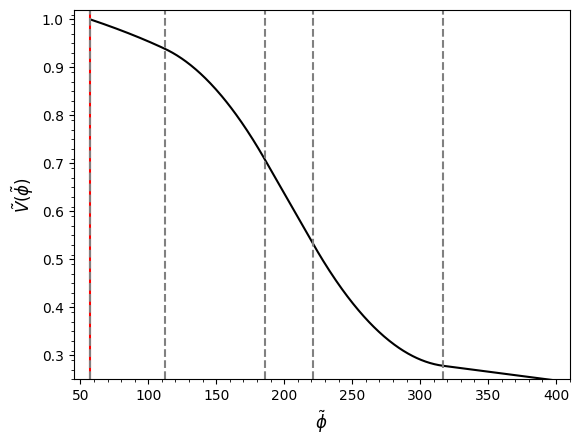

In [3]:
V = G.potential()
x  = G.vals["phi"]*G.beta
y = V/V[0]

plt.plot(x, y, "k")

xticks = np.arange(50, 450, 50)
xticksmin = np.arange(50, 420, 10)
plt.xticks(xticks)
plt.xticks(xticksmin, minor=True)   
plt.xlim(45, 410)
plt.xlabel(r"$\tilde\phi$", fontsize="large")

yticks = np.arange(0.3, 1.1, 0.1)
yticksmin = np.arange(0.25, 1.02, 0.02)
plt.yticks(yticks)
plt.yticks(yticksmin, minor=True)   
plt.ylim(0.25, 1.02)
plt.ylabel(r"$\tilde{V}({\tilde\phi})$", fontsize="large")

plt.vlines([x[0], x[-1]], 0.25, 1.02, "r")
plt.vlines([57, 112, 186, 221, 317], 0.25, 1.02, "gray", "dashed")
plt.savefig("FlashingBeacon/Potential.pdf")
plt.show()

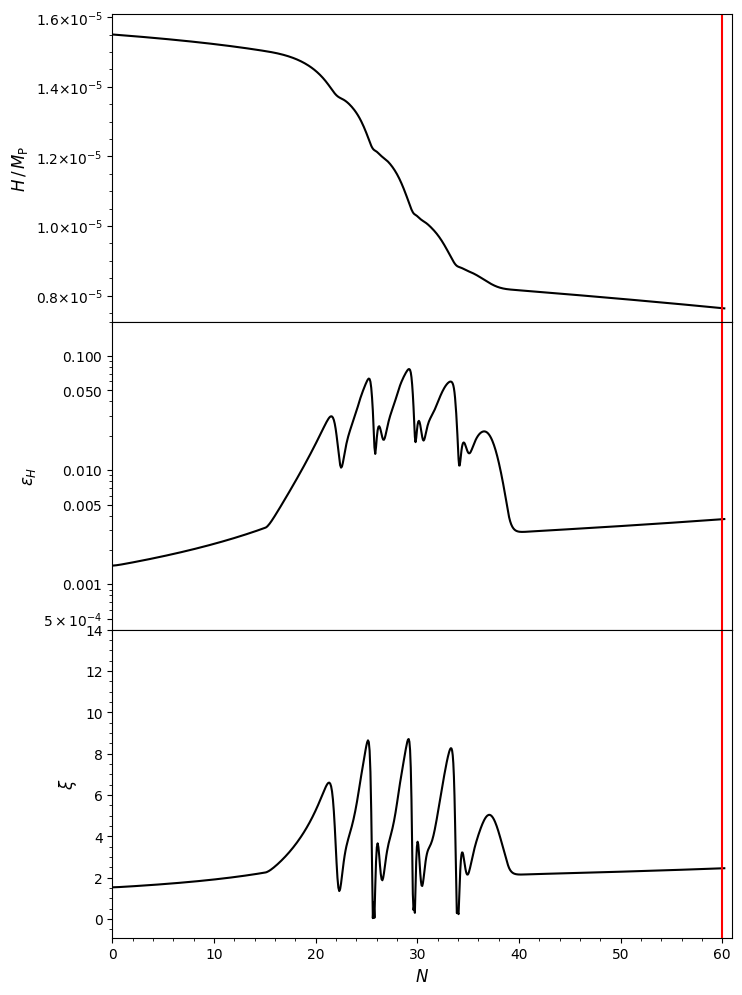

In [4]:

epsH = -G.vals["Hprime"]/G.vals["H"]**2

fig, ax = plt.subplots(3,1, sharex=True, figsize=(8,12))
ax[0].plot(G.vals["N"], G.vals["H"], "k")
ax[0].set_ylim(0.725e-5,1.61e-5)
yticks = np.round(np.arange(0.8, 1.61, 0.2),1)
ytickslab = [rf"${ytick}$" + r"$\times 10^{-5}$" for ytick in yticks]
ax[0].set_yticks(yticks*1e-5, ytickslab)
yticksmin = np.arange(0.75, 1.65, 0.05)
ax[0].set_yticks(yticksmin*1e-5, minor=True)
ax[0].set_ylabel(r"$H\, /\,M_{\rm P}$", fontsize="large")

ax[1].plot(G.vals["N"], epsH, "k")
yticks = [5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1]
ytickslab = [r"$5 \times 10^{-4}$", r"$0.001$", r"$0.005$", r"$0.010$", r"$0.050$", r"$0.100$"]

ax[1].set_ylim(4e-4,0.2)
ax[1].set_yscale("log")
ax[1].set_yticks(yticks, ytickslab)
ax[1].set_ylabel(r"$\varepsilon_H$", fontsize="large")

ax[2].plot(G.vals["N"], abs(G.vals["xi"]), "k")
yticks = np.arange(0, 15, 2)
ax[2].set_yticks(yticks)
yticksmin = np.arange(-0.5, 14.5, 0.5)
ax[2].set_yticks(yticksmin, minor=True)
ax[2].set_ylim(-0.9, 14)
ax[2].set_ylabel(r"$\xi$", fontsize="large")


ax[2].set_xticks(np.arange(0, 70, 10))
ax[2].set_xticks(np.arange(0, 70, 2), minor=True)
ax[2].set_xlim(0, 61)
ax[2].set_xlabel(r"$N$", fontsize="large")
for a in ax:
    y=a.get_ylim()
    a.vlines(60, y[0], y[1], "r")
plt.subplots_adjust(hspace=0)
plt.savefig("FlashingBeacon/InflationParameters.pdf")
plt.show()

In [5]:
MbM = ModeByMode(G)
if G.ModeData==None:
    ks = np.exp(np.linspace(np.log(MbM.mink), np.log(MbM.maxk), 1000))
    ks, tstart = MbM.InitialKTN(ks, mode="k")
    Neval = np.arange(max(G.vals["N"]), 5, -0.1)[::-1]
    #print(Neval)
    teval = CubicSpline(G.vals["N"], G.vals["t"])(Neval)
    plt.plot(tstart, ks)
    plt.plot(G.vals["t"], 10**(5/2)*G.vals["kh"], "r:")
    plt.yscale("log")
    plt.show()

    Ap = []
    dAp = []
    Am = []
    dAm = []
    for i, k in enumerate(ks):
        A1, A2, A3, A4 = MbM.ComputeMode(k, tstart[i], teval=teval, rtol=1e-5)
        Ap.append(A1)
        Am.append(A3)
        dAp.append(A2)
        dAm.append(A4)
    Ap = np.array(Ap)
    Am = np.array(Am)
    dAp = np.array(dAp)
    dAm = np.array(dAm)

    G.ModeData = "/home/users/rfreiher/Documents/Axion_Inflation/GEF/Modes/MbM_Beta57_Weird.dat"
    MbM.SaveMode(teval, ks, Ap, dAp, Am, dAm, name=G.ModeData)
else:
     teval, Neval, ks, Ap, dAp, Am, dAm =  ReadMode(G.ModeData)
     Neval = np.array(list(Neval))


1.55037710649343e-05
[146.94640291]


In [6]:
EMode = []
BMode = []
GMode = []

for i, t in enumerate(teval):
    Etmp, Btmp, Gtmp = MbM.ComputeEBGnMode(Ap[:,i], Am[:,i], dAp[:,i], dAm[:,i], t, ks)
    EMode.append(Etmp)
    BMode.append(Btmp)
    GMode.append(Gtmp)
    
EMode1 = np.array(EMode)
BMode1 = np.array(BMode)
GMode1 = np.array(GMode)

/tmp/ipykernel_106529/1051202041.py:9: RuntimeWarning: divide by zero encountered in divide
  errE = abs(ER - EMode1)/EMode1
/tmp/ipykernel_106529/1051202041.py:11: RuntimeWarning: divide by zero encountered in divide
  errB = abs(BR - BMode1)/BMode1
/tmp/ipykernel_106529/1051202041.py:13: RuntimeWarning: divide by zero encountered in divide
  errG = abs(GR - GMode1)/GMode1


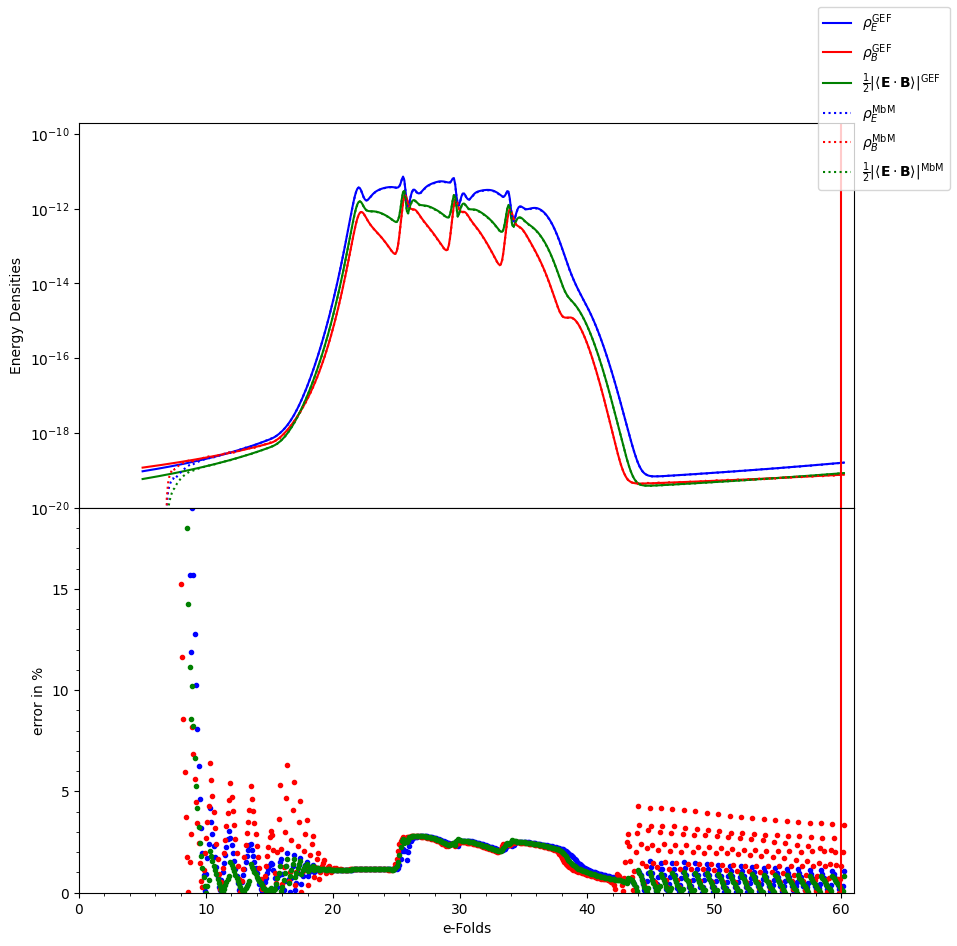

In [7]:
fig, ax = plt.subplots(2,1, figsize=(10,10), sharex=True)
ER = CubicSpline(G.vals["N"], G.vals["E"])(Neval)
BR = CubicSpline(G.vals["N"], G.vals["B"])(Neval)
GR = CubicSpline(G.vals["N"], G.vals["G"])(Neval)
NR = Neval

omega = G.H0
rhoE = 0.5*ER*omega**4
errE = abs(ER - EMode1)/EMode1
rhoB = 0.5*BR*omega**4
errB = abs(BR - BMode1)/BMode1
rhoG = 0.5*abs(GR)*omega**4
errG = abs(GR - GMode1)/GMode1



ax[0].plot(NR, rhoE, "b", label=r"$\rho_E^{\mathrm{GEF}}$")
ax[0].plot(NR, rhoB, "r", label=r"$\rho_B^{\mathrm{GEF}}$")
ax[0].plot(NR, rhoG, "g", label=r"$\frac{1}{2} |\langle \mathbf{E} \cdot \mathbf{B} \rangle|^{\mathrm{GEF}}$")
ax[0].plot(NR, 0.5*EMode1*omega**4, "b:", label=r"$\rho_E^{\mathrm{MbM}}$")
ax[0].plot(NR, 0.5*BMode1*omega**4, "r:", label=r"$\rho_B^{\mathrm{MbM}}$")
ax[0].plot(NR, 0.5*abs(GMode1)*omega**4, "g:", label=r"$\frac{1}{2} |\langle \mathbf{E} \cdot \mathbf{B} \rangle|^{\mathrm{MbM}}$")


yticks = 10**(-1.*np.arange(18, 9, 2))

ax[0].set_ylim(1e-20, 2e-10)
ax[0].set_yticks(yticks)
ax[0].set_ylabel("Energy Densities")
ax[0].set_yscale("log")

ax[1].plot(NR, abs(errE*100), "b.")
ax[1].plot(NR, abs(errB*100), "r.")
ax[1].plot(NR, abs(errG*100), "g.")


yticks = np.arange(0, 20, 5)
yticksmin =  np.arange(0, 20, 1)

ax[1].set_yticks(yticks)
ax[1].set_yticks(yticksmin, minor=True)
ax[1].set_ylim(0, 19)
ax[1].set_ylabel("error in %")

xticks = np.arange(0, 70, 10)
xticksmin = np.arange(0, 70, 2)

ax[1].set_xticks(xticks)
ax[1].set_xticks(xticksmin, minor=True)
ax[1].set_xlim(0, 61)
ax[1].set_xlabel("e-Folds")


lines_labels = [ax[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
for a in ax:
    y=a.get_ylim()
    a.vlines(60, y[0], y[1], "r")
plt.subplots_adjust(hspace=0)
fig.legend(lines, labels)

In [8]:
P = PowSpecT(G)

1.55037710649343e-05
[146.94640291]
This GEF run has not run reached the end of inflation. The code will assume Nend = max(N). Proceed with caution!
146.9464029072441


In [9]:
kgrid = np.logspace(np.log10(P.mink), np.log10(P.maxk), 300)
PT = P.ComputePowSpec(kgrid, ModePath=G.ModeData, Nfin=60)

In [10]:
fs = P.ktofreq(kgrid)

OmegaGWP = P.PTtoOmega(PT["ind+,++"]/2, kgrid)
OmegaGWM = P.PTtoOmega(PT["ind-,++"]/2, kgrid)
OmegaGWvac = P.PTtoOmega(PT["vac"], kgrid)


['IPTA', 'BBO', 'NANOGrav', 'HL', 'SKA', 'PPTA', 'NANOGrav', 'ET', 'CE', 'DECIGO', 'EPTA', 'HLVK', 'LISA', 'HLVO2', 'HLV']


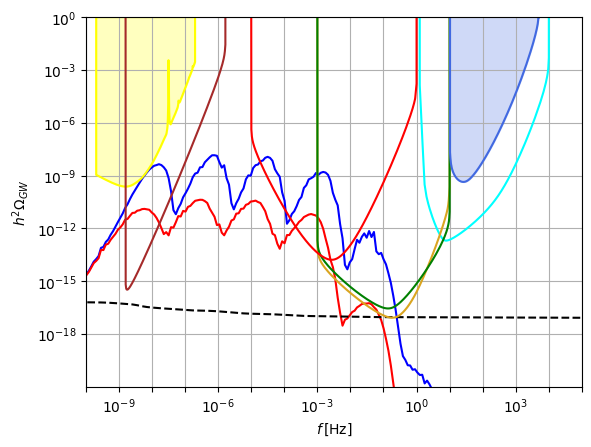

In [11]:

fig, ax = plt.subplots(1,1)

ax.plot(fs, OmegaGWP, "b")
ax.plot(fs, OmegaGWM, "r")
ax.plot(fs, OmegaGWvac, "k--")

PlotSensitivityCurves(ax, ["ET", "BBO", "DECIGO", "NANOGrav", "SKA", "LISA", "HLVK"],
                       ["aqua", "goldenrod", "green", "yellow", "brown", "red", "royalblue"])

#yAxis
yticks = 10**(np.arange(-18., 3, 3))

ax.set_ylabel("$h^2 \Omega_{GW}$")
ax.set_yscale("log")
ax.set_ylim(1e-21, 1e0)
ax.set_yticks(yticks)


#xAxis
x1 = np.round(np.arange(-9, 6, 3),0)
x2 = np.round(np.arange(-10, 6, 1))

ax.set_xlabel(r"$f\,[{\rm Hz}]$")
ax.set_xscale("log")
ax.set_xlim(1e-10, 1e5)
xlabels = []
xticks = []
for x in x2:
    if x in x1:
        if x >= 0:
            xlabels.append(rf"$10^{x}$")
        else:
            xlabels.append(r"$10^{-}$" + rf"$^{abs(x)}$")
    else: xlabels.append("")
    xticks.append(10**float(x))
ax.set_xticks(xticks, xlabels)
#ax.set_xticks(xticksmin, minor=True)


ax.grid(True)

plt.savefig("FlashingBeacon/OmegaGW_DOF.pdf")
plt.show()